In [1]:
import numpy as np
np.random.seed(0)

import pymc3 as pm
import arviz as az

import matplotlib.pyplot as plt
import tikzplotlib

In [2]:
def get_utility(g, price, p_bar):
    if g > price:
        return 0
    
    if g < p_bar:
        if p_bar < price:
            return 0
        
        return price
    
    return price


def get_expected_utility(g, price_samples, p_bar):
    utilities = np.array([
        get_utility(g, price, p_bar)
        for price in price_samples
    ])
    
    return utilities.mean()

In [3]:
with pm.Model() as price_model:
    p = pm.Normal('p', mu=100, sd=10)
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


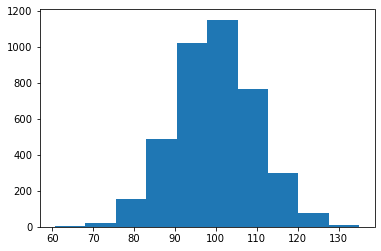

In [4]:
plt.hist(trace['p']);

In [5]:
# p_bars = [50, 75, 100, 125, 150]
p_bars = [75]

guesses = np.linspace(0, 200, 1000)

expected_utilities = np.array([[
    get_expected_utility(g, trace['p'], p_bar)
    for g in guesses
] for p_bar in p_bars])

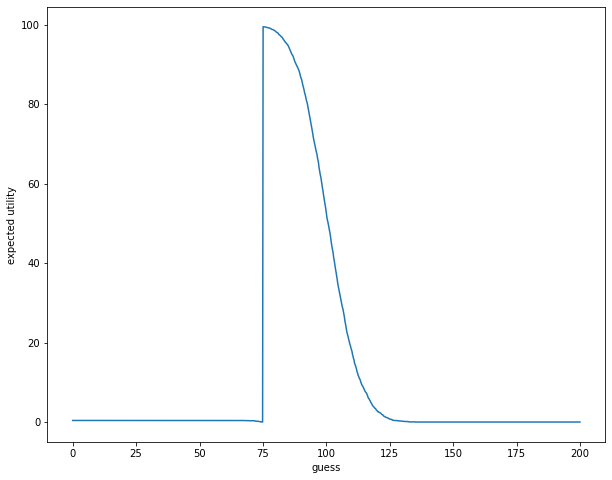

In [8]:
fig = plt.figure(figsize=(10, 8))

for i, p_bar in enumerate(p_bars):
    plt.plot(
        guesses, expected_utilities[i, :],
        label=f'p bar = {p_bar}'
    )
    # plt.axvline(guesses[np.argmax(expected_utilities[i])])


# plt.legend()    
plt.xlabel('guess')
plt.ylabel('expected utility')

# plt.show()
tikzplotlib.save('price.tex')